# Decision Tree (Random Forest) Regression

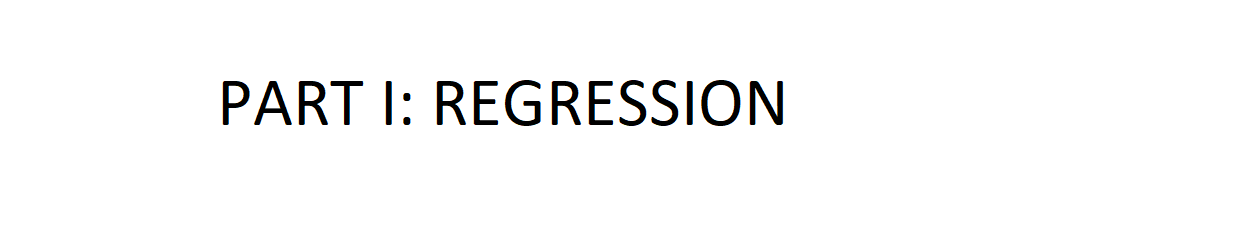

## 1 - LOAD DATA  

#### Data Source 

In [ ]:
# surface_tension_ILs.xlsx

#### Import Packages 

In [189]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
import graphviz 
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_squared_error, median_absolute_error, explained_variance_score

#### Preparing DataFrame

In [164]:
df = pd.read_excel("surface_tension_ILs.xlsx")

In [166]:
df.drop_duplicates(inplace= True)

In [167]:
# Get columns from the user
target = 'ST' 
df[target] = df[df.columns[-1]]
features = ['T','Tc','Pc','w']
target_list = [target]
all_columns = ['T','Tc','Pc','w',target]
df_sub = df[all_columns]
df_sub.head()

,T,Tc,Pc,w,ST
0,278.75,1249.3,33.027,0.2157,37.31
1,288.15,1249.3,33.027,0.2157,36.58
2,293.15,1249.3,33.027,0.2157,36.94
3,298.15,1249.3,33.027,0.2157,35.71
4,303.15,1249.3,33.027,0.2157,36.43


In [168]:
X = df_sub[features].to_numpy()
y = df_sub[target].to_numpy()

## 2 - DATA ANALYSIS 

In [169]:
# sns.pairplot(df_sub)

## 3 - FIT THE MODEL

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) # random_state = the same split eahc tim

clf = tree.DecisionTreeRegressor()   # for regression 
# clf = DecisionTreeClassifier()    for classifications

param = {'ccp_alpha': 0.0, #Greater values of ccp_alpha increase the number of nodes pruned. 
                           # By default, the value is zero meaning that no pruning is performed.
 'criterion': 'mse', # for classfification: gini | entropy 
 'max_depth': 3, # used for regularization (avoid ovetfitting). No.leaf nodes = 2^max_depth. It controls the complexity of branching
         # small -> underfitting | large -> overfitting
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2, # min_samples_split: Specifies the minimum number of samples required to split an internal node. 
         # The default is 2. If we set its value to 5, no further splits are permitted for nodes with five samples or fewer.
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None, 
 'splitter': 'best'} # best | random

clf.set_params(**param)

clf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Predict y for X_test

In [171]:
predictions_test = clf.predict(X_test)
print('Prediction array size =', predictions_test.size)

Prediction array size = 312


## 4 - EXPORT Test | Train DFs 

In [172]:
X_train_df = pd.DataFrame(X_train)
X_train_df.columns = features
X_train_df['y_train'] = y_train

X_test_df = pd.DataFrame(X_test)
X_test_df.columns = features
X_test_df['y_test'] = y_test

X_test_df.to_excel('X_test_df.xlsx')
X_train_df.to_excel('X_train_df.xlsx')

#### Preparing DataFrame for the Test Split

In [173]:
df_predict_y_test = pd.DataFrame(predictions_test)
df_X_test= pd.DataFrame(X_test)
dfs = [df_X_test,df_predict_y_test]
df_test_predict = pd.concat(dfs, axis=1)
df_test_predict.columns = features + [target+'pred']
df_test_predict.head(2)

,T,Tc,Pc,w,STpred
0,306.15,1038.702046,26.159,0.333371,42.714409
1,307.05,1119.200000,18.887,0.560757,31.030049


#### Join Predicted and Original DataFrames to Compare the Target (for TEST split)

In [174]:
df_final_compared_test = df_test_predict.merge(df_sub, how='left', on=features)
print('Total rows = ', df_final_compared_test.shape)
print('Number of rows (no duplicate) = ', df_final_compared_test.drop_duplicates().shape)
df_final_compared_test.head()

Total rows =  (313, 6)
Number of rows (no duplicate) =  (313, 6)


,T,Tc,Pc,w,STpred,ST
0,306.15,1038.702046,26.159,0.333371,42.714409,37.80
1,307.05,1119.200000,18.887,0.560757,31.030049,34.45
2,347.67,764.900000,15.655,0.869700,37.310714,35.21
3,319.87,1292.800000,24.139,0.389300,31.030049,34.84
4,318.15,1102.500000,19.998,0.514600,31.030049,26.56


In [175]:
df_final_compared_test.to_excel('test_calc.xlsx')

#### Predict y for X_train

In [176]:
predictions_train = clf.predict(X_train)
# print(classification_report(y_test,predictions))    for classification

#### Preparing DataFrame for the Train Split

In [177]:
df_predict_y_train = pd.DataFrame(predictions_train)
df_X_train= pd.DataFrame(X_train)
dfs2 = [df_X_train,df_predict_y_train]
df_train_predict = pd.concat(dfs2, axis=1)
df_train_predict.columns = features + [target+'pred']
df_train_predict.head(2)

,T,Tc,Pc,w,STpred
0,363.00,764.9,15.655,0.869700,37.310714
1,343.14,992.3,36.158,0.325512,42.714409


#### Join Predicted and Original DataFrames to Compare the Target (for TRAIN split)

In [178]:
df_final_compared_train = df_train_predict.merge(df_sub, how='left', on=features)
print('Total rows = ', df_final_compared_train.shape)
print('Number of rows (no duplicate) = ', df_final_compared_train.drop_duplicates().shape)
df_final_compared_train.head()

Total rows =  (739, 6)
Number of rows (no duplicate) =  (729, 6)


,T,Tc,Pc,w,STpred,ST
0,363.00,764.900000,15.655000,0.869700,37.310714,38.80
1,343.14,992.300000,36.158000,0.325512,42.714409,38.85
2,343.00,789.000000,28.179000,0.491367,42.714409,45.30
3,308.15,1308.361744,93.909182,0.964544,31.030049,27.02
4,272.08,992.300000,36.158000,0.325512,42.714409,41.28


In [179]:
df_final_compared_train.to_excel('train_calc.xlsx')

# 5 - STATISTICAL ANALYSIS

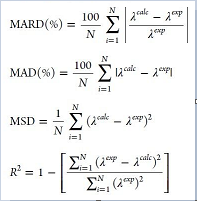

#### MARD (%)

In [180]:
def diff_mard(row):
    return abs(row[0]-row[1])/row[1]

df_final_compared_test['diff_mard'] = df_final_compared_test[[target+'pred',target]].apply(diff_mard, axis=1)
MARD = 100 / df_final_compared_test.shape[0] * sum(df_final_compared_test['diff_mard'])
print('MARD =', MARD, '%')

MARD = 9.870402283793394 %


#### MAD (%) 

In [181]:
def diff_mad(row):
    return abs(row[0]-row[1])

df_final_compared_test['diff_mad'] = df_final_compared_test[[target+'pred',target]].apply(diff_mad, axis=1)
MAD = 100 / df_final_compared_test.shape[0] * sum(df_final_compared_test['diff_mad'])
print('MAD =', MAD, '%')

MAD = 369.81080545912914 %


#### MSD

In [182]:
def diff_msd(row):
    return (row[0]-row[1])*(row[0]-row[1])

df_final_compared_test['diff_msd'] = df_final_compared_test[[target+'pred',target]].apply(diff_msd, axis=1)
MSD = 1 / df_final_compared_test.shape[0] * sum(df_final_compared_test['diff_msd'])
print('MSD =', MSD, '%')

MSD = 26.083344626077164 %


#### R2

In [183]:
def diff_R21(row):
    return (row[0]-row[1])*(row[0]-row[1])
def diff_R22(row):
    return row*row

df_final_compared_test['diff_R21'] = df_final_compared_test[[target+'pred',target]].apply(diff_R21, axis=1)
df_final_compared_test['diff_R22'] = df_final_compared_test['ST'].apply(diff_R22)
R2 = 1 - sum(df_final_compared_test['diff_R21'])/sum(df_final_compared_test['diff_R22'])
print('R2 =', R2)

R2 = 0.9827937646835506


#### AARD: Absolute average relative deviation

#### RMSEP: Root mean square error of prediction

In [185]:
mean_squared_error(predictions_test,y_test)

26.164519402801325

#### Median Absolute Error

In [187]:
median_absolute_error(predictions_test,y_test)

2.7228203294665985

#### Variance

In [191]:
explained_variance_score(predictions_test,y_test)

0.5064395683562923

Various metrics to analysis the data in Scikitlearn:
<br>
https://scikit-learn.org/stable/modules/model_evaluation.html

#### Fitting Score: quality of fitting (no info abou the test data)

In [106]:
clf.score(X_test,y_test)

0.6384070374601967

## 6 - TUNIING PARAMETERS

**Parameters**: 
<br>
> 1- **max_depth**: used for regularization (avoid ovetfitting). No.leaf nodes = 2^max_depth. It controls the complexity of branching. small -> underfitting | large -> overfitting
<br>
> 2- **min_samples_split**: min_samples_split: Specifies the minimum number of samples required to split an internal node. The default is 2. If we set its value to 5, no further splits are permitted for nodes with five samples or fewer.
<br>
> 3- **ccp_alpha**: Greater values of ccp_alpha increase the number of nodes pruned. By default, the value is zero meaning that no pruning is performed. use **clf.cost_complexity_pruning_path(X_train, y_train)** for the range of ccp_alpha required for loop

**Methods**: 
<br>
> 1- Writing loops for **Parameters** and plotting MARD/MSE/etc. 
<br>
2- Using **Grid Search** for automatic multi-parameter tuning
<br>
3- **Random Forest**

### 1/3 - Writing Loop for max_depth (to be repeated for the other two parameters) 

COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE


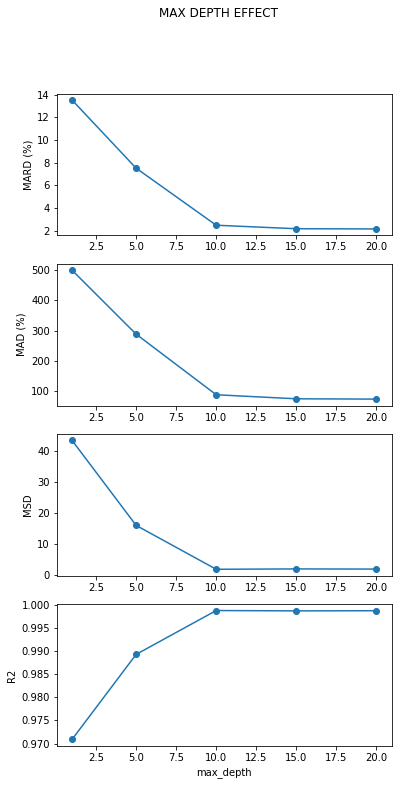

In [108]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
# pip install graphviz
import graphviz 
import pandas as pd
import numpy as np

# test_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
test_list = [0.3]
max_depth_list = [1,5,10,15,20]
MARD = []
MAD = []
MSD = []
R2 = []

target = 'ST' 
df[target] = df[df.columns[-1]]
features = ['T','Tc','Pc','w']
target_list = [target]
all_columns = ['T','Tc','Pc','w',target]
df_sub = df[all_columns]
df_sub.head()

X = df_sub[features].to_numpy()
y = df_sub[target].to_numpy()
    
for max_depth in max_depth_list:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    clf = tree.DecisionTreeRegressor()   # for regression 
    # clf = DecisionTreeClassifier()    for classifications
    
    param = {'ccp_alpha': 0.0,
     'criterion': 'mse',
     'max_depth': max_depth,
     'max_features': None,
     'max_leaf_nodes': None,
     'min_impurity_decrease': 0.0,
     'min_impurity_split': None,
     'min_samples_leaf': 1,
     'min_samples_split': 2,
     'min_weight_fraction_leaf': 0.0,
     'presort': 'deprecated',
     'random_state': None,
     'splitter': 'best'}

    clf.set_params(**param)


    clf.fit(X_train, y_train)

    # X_test_df.to_excel('X_test_df.xlsx')
    # X_train_df.to_excel('X_train_df.xlsx')

    predictions_test = clf.predict(X_test)

    df_predict_y_test = pd.DataFrame(predictions_test)
    df_X_test= pd.DataFrame(X_test)
    dfs = [df_X_test,df_predict_y_test]
    df_test_predict = pd.concat(dfs, axis=1)
    df_test_predict.columns = features + [target+'pred']

    df_final_compared_test = df_test_predict.merge(df_sub, how='left', on=['T','Pc','Tc','w'])

    # MARD
    def diff_mard(row):
        return abs(row[0]-row[1])/row[1]

    df_final_compared_test['diff_mard'] = df_final_compared_test[[target+'pred',target]].apply(diff_mard, axis=1)
    MARD.append(100 / df_final_compared_test.shape[0] * sum(df_final_compared_test['diff_mard']))
    

    # MAD
    def diff_mad(row):
        return abs(row[0]-row[1])

    df_final_compared_test['diff_mad'] = df_final_compared_test[[target+'pred',target]].apply(diff_mad, axis=1)
    MAD.append(100 / df_final_compared_test.shape[0] * sum(df_final_compared_test['diff_mad']))

    # MSD
    def diff_msd(row):
        return (row[0]-row[1])*(row[0]-row[1])

    df_final_compared_test['diff_msd'] = df_final_compared_test[[target+'pred',target]].apply(diff_msd, axis=1)
    MSD.append(1 / df_final_compared_test.shape[0] * sum(df_final_compared_test['diff_msd']))

    def diff_R21(row):
        return (row[0]-row[1])*(row[0]-row[1])
    def diff_R22(row):
        return row*row

    df_final_compared_test['diff_R21'] = df_final_compared_test[[target+'pred',target]].apply(diff_R21, axis=1)
    df_final_compared_test['diff_R22'] = df_final_compared_test['ST'].apply(diff_R22)
    R2.append(1 - sum(df_final_compared_test['diff_R21'])/sum(df_final_compared_test['diff_R22']))
    print('COMPLETE')
    

import matplotlib.pyplot as plt

x = max_depth_list

y_MARD = MARD
y_MAD = MAD
y_MSD = MSD
y_R2 = R2

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
fig.suptitle('MAX DEPTH EFFECT')

ax1.plot(x, y_MARD, 'o-')
ax1.set_ylabel('MARD (%)')

ax2.plot(x, y_MAD, 'o-')
ax2.set_ylabel('MAD (%)')

ax3.plot(x, y_MSD, 'o-')
ax3.set_ylabel('MSD')

ax4.plot(x, y_R2, 'o-')
ax4.set_xlabel('max_depth')
ax4.set_ylabel('R2')

fig.set_size_inches(6, 12, forward=True)

plt.show()

### 2/3- Using Grid Search (multi parameter tunning)

In [135]:
# find the range of ccp_alpha
clf.cost_complexity_pruning_path(X_train, y_train)

{'ccp_alphas': array([0.00000000e+00, 1.60000000e-02, 2.98669005e-01, 7.89196152e-01,
        1.96894026e+00, 8.87296648e+00, 9.88166884e+00, 2.74115042e+01]),
 'impurities': array([24.84249885, 24.85849885, 25.15716786, 25.94636401, 27.91530427,
        36.78827075, 46.66993959, 74.08144381])}

In [136]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(clf,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 100),
                                'ccp_alpha': np.arange(0, 74, 5)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'ccp_alpha': 0, 'max_depth': 10, 'min_samples_split': 10}
3.4205339247250803


#### Plotting Grid Search Results 

In [411]:
%matplotlib notebook

In [111]:
from sklearn.model_selection import train_test_split

from sklearn import tree
# pip install graphviz
import graphviz 
import pandas as pd
import numpy as np

# test_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
test_list = [0.3]
max_depth_list = [1,2,3]
min_sample_splits = [2,5,10]
MARD = []
MAD = []
MSD = []
R2 = []
MARD_multid = []

target = 'ST' 
df[target] = df[df.columns[-1]]
features = ['T','Tc','Pc','w']
target_list = [target]
all_columns = ['T','Tc','Pc','w',target]
df_sub = df[all_columns]
df_sub.head()

X = df_sub[features].to_numpy()
y = df_sub[target].to_numpy()
    
for min_sample_split in min_sample_splits:
    for max_depth in max_depth_list:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

        clf = tree.DecisionTreeRegressor()   # for regression 
        # clf = DecisionTreeClassifier()    for classifications

        param = {'ccp_alpha': 0.0,
         'criterion': 'mse',
         'max_depth': max_depth,
         'max_features': None,
         'max_leaf_nodes': None,
         'min_impurity_decrease': 0.0,
         'min_impurity_split': None,
         'min_samples_leaf': 1,
         'min_samples_split': min_sample_split,
         'min_weight_fraction_leaf': 0.0,
         'presort': 'deprecated',
         'random_state': None,
         'splitter': 'best'}

        clf.set_params(**param)


        clf.fit(X_train, y_train)

        # X_test_df.to_excel('X_test_df.xlsx')
        # X_train_df.to_excel('X_train_df.xlsx')

        predictions_test = clf.predict(X_test)

        df_predict_y_test = pd.DataFrame(predictions_test)
        df_X_test= pd.DataFrame(X_test)
        dfs = [df_X_test,df_predict_y_test]
        df_test_predict = pd.concat(dfs, axis=1)
        df_test_predict.columns = features + [target+'pred']

        df_final_compared_test = df_test_predict.merge(df_sub, how='left', on=['T','Pc','Tc','w'])

        # MARD
        def diff_mard(row):
            return abs(row[0]-row[1])/row[1]

        df_final_compared_test['diff_mard'] = df_final_compared_test[[target+'pred',target]].apply(diff_mard, axis=1)
        MARD = (100 / df_final_compared_test.shape[0] * sum(df_final_compared_test['diff_mard']))


        # MAD
        def diff_mad(row):
            return abs(row[0]-row[1])

        df_final_compared_test['diff_mad'] = df_final_compared_test[[target+'pred',target]].apply(diff_mad, axis=1)
        MAD = (100 / df_final_compared_test.shape[0] * sum(df_final_compared_test['diff_mad']))

        # MSD
        def diff_msd(row):
            return (row[0]-row[1])*(row[0]-row[1])

        df_final_compared_test['diff_msd'] = df_final_compared_test[[target+'pred',target]].apply(diff_msd, axis=1)
        MSD = (1 / df_final_compared_test.shape[0] * sum(df_final_compared_test['diff_msd']))

        def diff_R21(row):
            return (row[0]-row[1])*(row[0]-row[1])
        def diff_R22(row):
            return row*row

        df_final_compared_test['diff_R21'] = df_final_compared_test[[target+'pred',target]].apply(diff_R21, axis=1)
        df_final_compared_test['diff_R22'] = df_final_compared_test['ST'].apply(diff_R22)
        R2 = (1 - sum(df_final_compared_test['diff_R21'])/sum(df_final_compared_test['diff_R22']))
        
        MARD_multid.append([min_sample_split,max_depth,MARD])

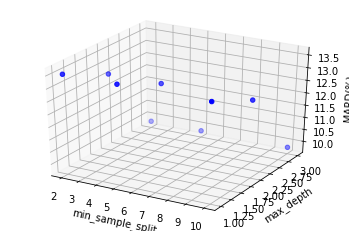

In [112]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
# x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
# y = x.copy().T # transpose
# z = np.cos(x ** 2 + y ** 2)
x= []
y = []
z = []

for item in MARD_multid:
    x.append(item[0])
    y.append(item[1])
    z.append(item[2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('min_sample_split')
ax.set_ylabel('max_depth')
ax.set_zlabel('MARD(%)')
ax.scatter3D(x, y, z, marker='o',c='b')

plt.show()

### 3/3- Using Random Forest 

In [471]:
from sklearn.ensemble import RandomForestRegressor

rfclf = RandomForestRegressor(n_estimators=100, random_state=42)
rfclf.fit(X_train, y_train)
predictions_test = rfclf.predict(X_test) # Predictions

#### Statistical Analysis of Random Forest 

In [113]:
df_predict_y_test = pd.DataFrame(predictions_test)
df_X_test= pd.DataFrame(X_test)
dfs = [df_X_test,df_predict_y_test]
df_test_predict = pd.concat(dfs, axis=1)
df_test_predict.columns = features + [target+'pred']

df_final_compared_test = df_test_predict.merge(df_sub, how='left', on=features)

# MARD
def diff_mard(row):
    return abs(row[0]-row[1])/row[1]

df_final_compared_test['diff_mard'] = df_final_compared_test[[target+'pred',target]].apply(diff_mard, axis=1)
MARD = (100 / df_final_compared_test.shape[0] * sum(df_final_compared_test['diff_mard']))


# MAD
def diff_mad(row):
    return abs(row[0]-row[1])

df_final_compared_test['diff_mad'] = df_final_compared_test[[target+'pred',target]].apply(diff_mad, axis=1)
MAD = (100 / df_final_compared_test.shape[0] * sum(df_final_compared_test['diff_mad']))

# MSD
def diff_msd(row):
    return (row[0]-row[1])*(row[0]-row[1])

df_final_compared_test['diff_msd'] = df_final_compared_test[[target+'pred',target]].apply(diff_msd, axis=1)
MSD = (1 / df_final_compared_test.shape[0] * sum(df_final_compared_test['diff_msd']))

def diff_R21(row):
    return (row[0]-row[1])*(row[0]-row[1])
def diff_R22(row):
    return row*row

df_final_compared_test['diff_R21'] = df_final_compared_test[[target+'pred',target]].apply(diff_R21, axis=1)
df_final_compared_test['diff_R22'] = df_final_compared_test[target].apply(diff_R22)
R2 = (1 - sum(df_final_compared_test['diff_R21'])/sum(df_final_compared_test['diff_R22']))

In [114]:
print('MARD', MARD, 'MAD', MAD, 'MSD', MSD, 'R2', R2)

MARD 9.807316705117673 MAD 369.42708163710324 MSD 25.271725334329545 R2 0.9830558991643408


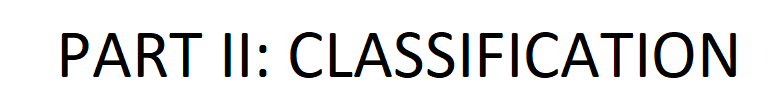

# Decision Tree (Random Forest) Classification 

Train accuracy: 1.0
Test accuracy: 0.71

Test confusion_matrix


Text(33.0, 0.5, 'True')

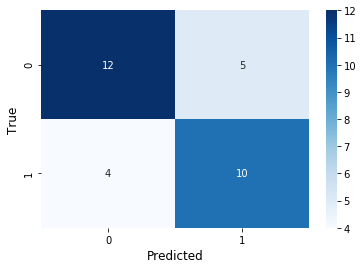

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("heart_disease.csv")
X = df.drop(columns="target")
y = df["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, 
                                                    random_state=0)

from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(random_state=42)
dtclf.fit(X_train, y_train)
y_pred = dtclf.predict(X_test) # Predictions
y_true = y_test # True values

from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 dtclf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

## Tuning Parameters

### Method 1: Tuning max_depth alone 

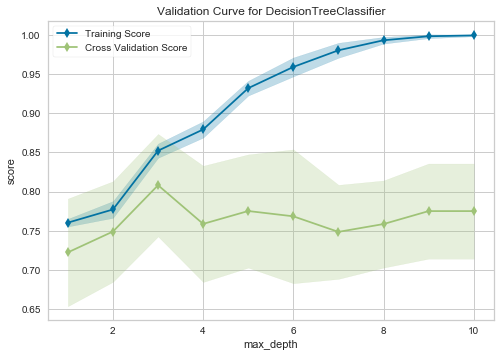

ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C8BEED588>,
                cv=10,
                estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 presort='deprecated',
                                               

In [138]:
from yellowbrick.model_selection import validation_curve 
from warnings import simplefilter
# Ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Plot the validation curve
print(validation_curve(dtclf, X, y, 
                       param_name="max_depth", n_jobs=-1,
                       param_range=np.arange(1, 11), 
                       cv=10, scoring="accuracy"))

**max_depth=3** is the best 

Let's re-fit by this new max_depth

Train accuracy: 0.84
Test accuracy: 0.74

Test confusion_matrix


Text(52.0, 0.5, 'True')

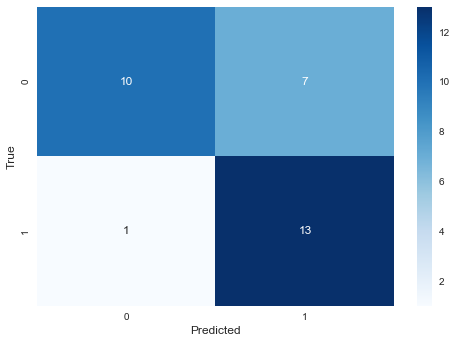

In [139]:
from sklearn.tree import DecisionTreeClassifier
dtclf_2 = DecisionTreeClassifier(max_depth=3, random_state=42)
dtclf_2.fit(X_train, y_train)
y_pred = dtclf_2.predict(X_test) # Predictions
y_true = y_test # True values

from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 dtclf_2.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### Method 2: Tuning multiple hyperparameters at once 

Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}

Mean cross-validated training accuracy score: 0.7723544973544973
Test accuracy: 0.87


Text(52.0, 0.5, 'True')

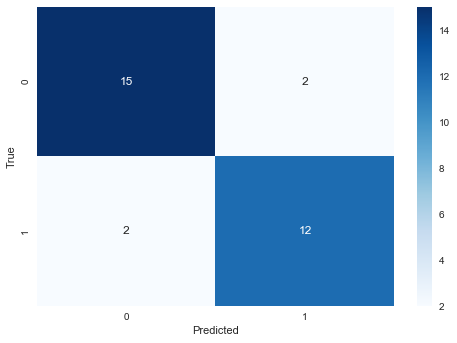

In [140]:
# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dtclf, param_grid=hyperparameter_space, 
                  scoring="accuracy",
                  n_jobs=-1, cv=10, return_train_score=True)

gs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", gs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      gs.best_score_)
gs.best_estimator_.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

### Method 3: Cost-complexity pruning (ccp)

In [142]:
path = dtclf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.        , 0.0033701 , 0.00341387, 0.00351662, 0.00356834,
       0.00360963, 0.00441176, 0.00490196, 0.00551471, 0.00554753,
       0.00588235, 0.00588235, 0.00608812, 0.00630252, 0.00630252,
       0.00668449, 0.00682639, 0.00687364, 0.00689935, 0.00972426,
       0.00993829, 0.01315789, 0.01382556, 0.01444906, 0.02070223,
       0.02895356, 0.05648774, 0.12929717])

#### Loop for varioys ccp_alpha 

In [143]:
acc_train = []
acc_test = []

for val in ccp_alphas:
  dtclf = DecisionTreeClassifier(ccp_alpha=val, random_state=42)
  dtclf.fit(X_train, y_train)
  y_pred = dtclf.predict(X_test) # Predictions
  y_true = y_test # True values
  acc_train.append(accuracy_score(y_train, dtclf.predict(X_train)))
  acc_test.append(accuracy_score(y_true, y_pred))

#### Plot the results 

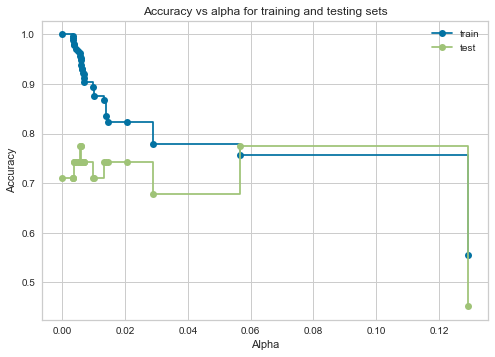

In [144]:
plt.plot(ccp_alphas, acc_train, marker='o', label="train",
         drawstyle="steps-post")
plt.plot(ccp_alphas, acc_test, marker='o', label="test",
         drawstyle="steps-post")
plt.title("Accuracy vs alpha for training and testing sets")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("plot.png")

optimal alpha value that mitigates overfitting in our decision tree model is **0.06**
<br>
we create the decision tree again by setting **ccp_alpha=0.06**

Train accuracy: 0.76
Test accuracy: 0.77

Test confusion_matrix


Text(52.0, 0.5, 'True')

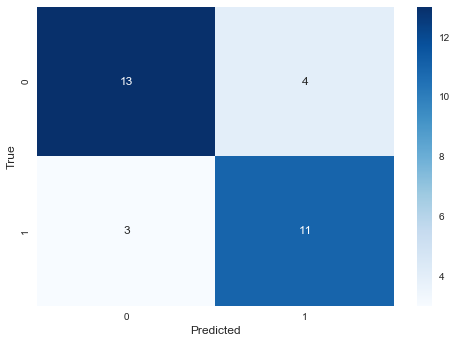

In [145]:
from sklearn.tree import DecisionTreeClassifier
dtclf_3 = DecisionTreeClassifier(ccp_alpha=0.06, random_state=42)
dtclf_3.fit(X_train, y_train)
y_pred = dtclf_3.predict(X_test) # Predictions
y_true = y_test # True values

from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 dtclf_3.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

## Method 4: Creating a random forest

Train accuracy: 1.0
Test accuracy: 0.84

Test confusion_matrix


Text(52.0, 0.5, 'True')

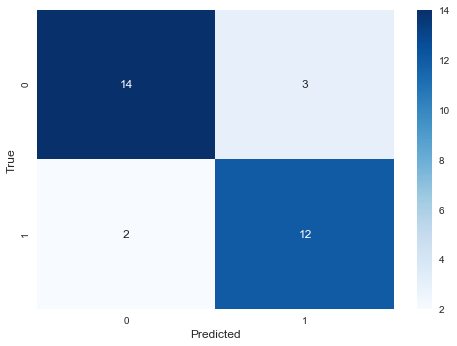

In [147]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100, random_state=42)
rfclf.fit(X_train, y_train)
y_pred = rfclf.predict(X_test) # Predictions
y_true = y_test # True values

from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 rfclf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

The model evaluation metric that we’ve used here is the “Accuracy” metric which is not the best option when the target variable has a class imbalance. We can check whether the target variable of our “heart_disease” dataset has a class imbalance or not:
 

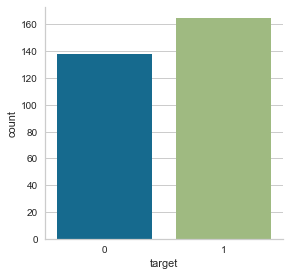

In [148]:
import seaborn as sns
sns.catplot("target", data=df, kind="count",
            aspect=1.0, height=4)

There is no apparent class imbalance in our target variable.

Various metrics to analysis the data in Scikitlearn:
<br>
https://scikit-learn.org/stable/modules/model_evaluation.html